
This is a project done by Karri Divya Naidu, a BTech Student in CSE. It is done as part of my AIML Internship on realtime data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("C:/Users/shiva/Downloads/user_profiles_for_ads.csv")
data.head(3)

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness


In [4]:
print(data.isnull().sum())

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


C:\Users\shiva\AppData\Local\Temp\ipykernel_12256\1534457429.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\shiva\AppData\Local\Temp\ipykernel_12256\1534457429.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\shiva\AppData\Local\Temp\ipykernel_12256\1534457429.py:17: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

C:\Users\shiva\AppData\Local\Temp\ipykernel_12256\1534457429.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\shiva\AppData\Local\Temp\ipykernel_12256\1534457429.py:21: UserWarni

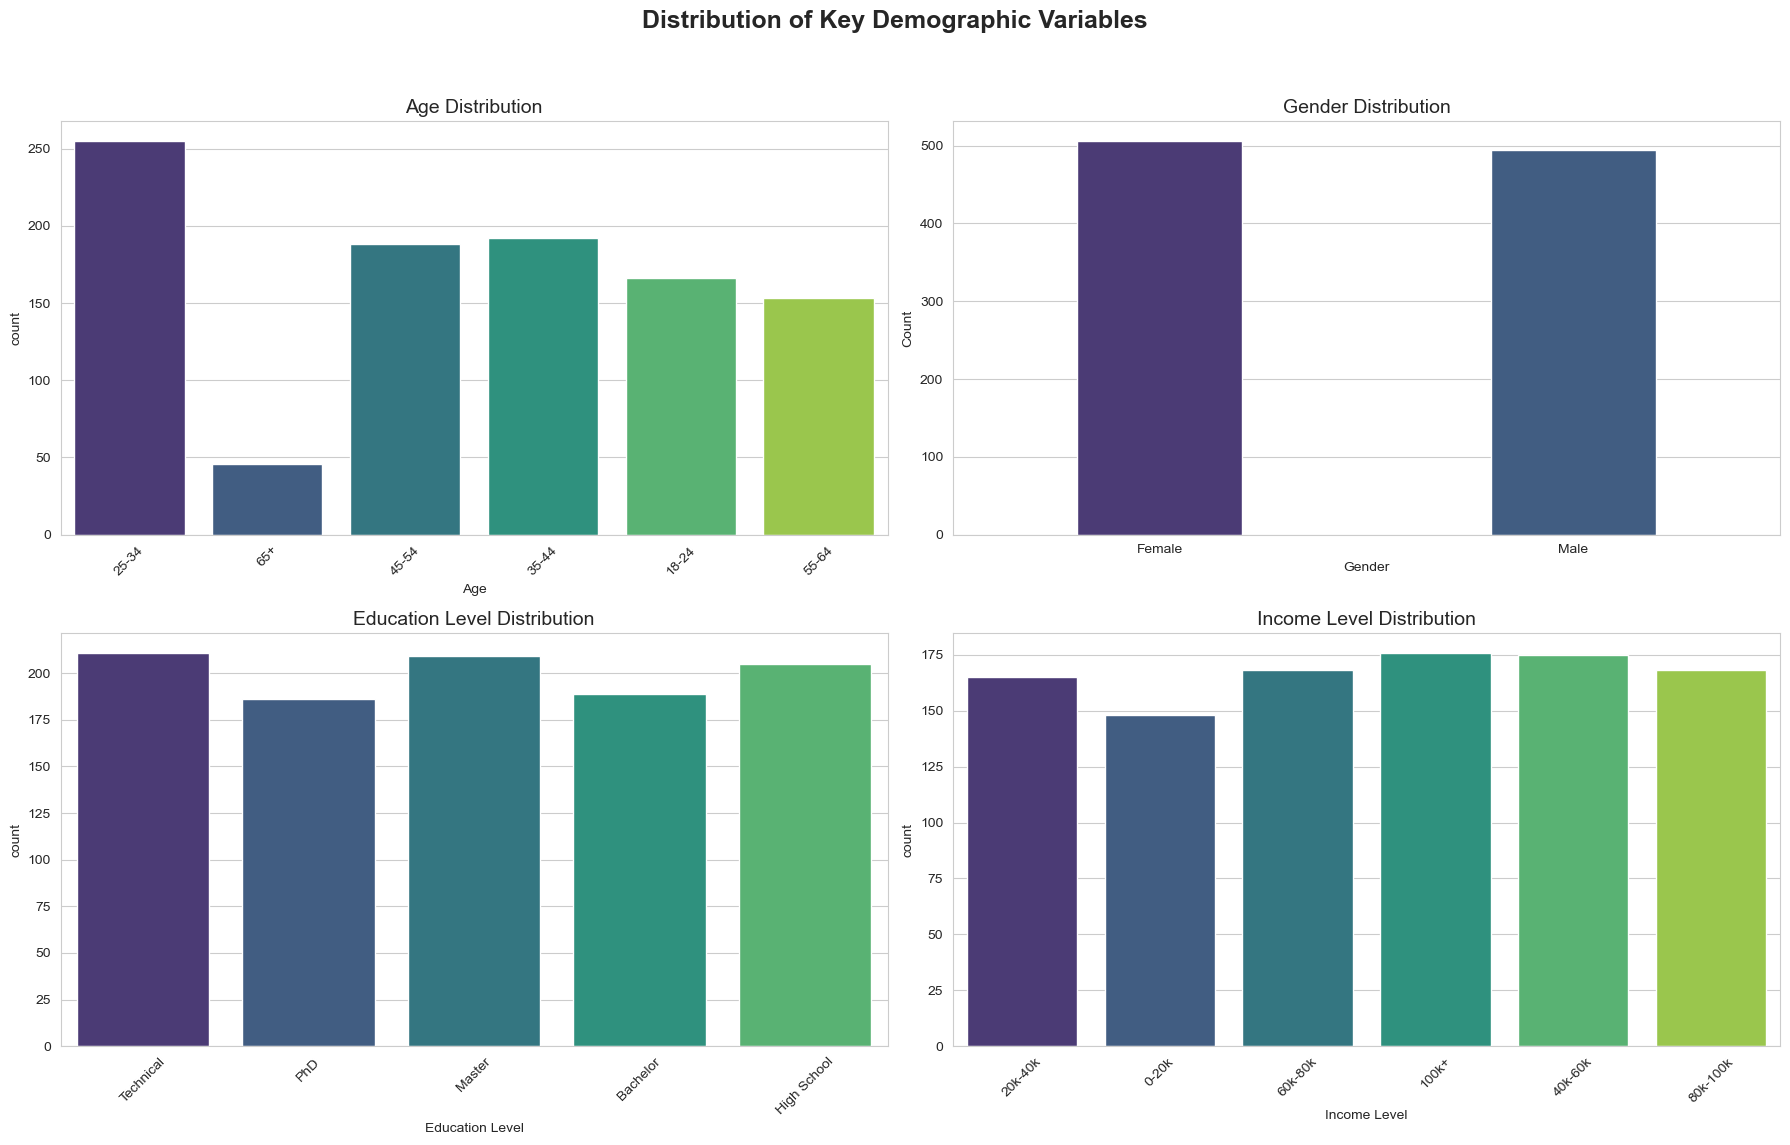

In [50]:
# Set the style
sns.set_style("whitegrid")
custom_palette = sns.color_palette("viridis")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Demographic Variables', fontsize=18, fontweight='bold')

# Age distribution
sns.countplot(ax=axes[0, 0], x='Age', data=data, palette=custom_palette)
axes[0, 0].set_title('Age Distribution', fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=45)

# Gender distribution (fixed width using barplot instead of countplot)
gender_counts = data['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
sns.barplot(ax=axes[0, 1], x='Gender', y='Count', data=gender_counts, palette=custom_palette, width=0.4)
axes[0, 1].set_title('Gender Distribution', fontsize=14)

# Education level distribution
sns.countplot(ax=axes[1, 0], x='Education Level', data=data, palette=custom_palette)
axes[1, 0].set_title('Education Level Distribution', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)


# Income level distribution
sns.countplot(ax=axes[1, 1], x='Income Level', data=data, palette=custom_palette)
axes[1, 1].set_title('Income Level Distribution', fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


C:\Users\shiva\AppData\Local\Temp\ipykernel_12256\2954355714.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\shiva\AppData\Local\Temp\ipykernel_12256\2954355714.py:6: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



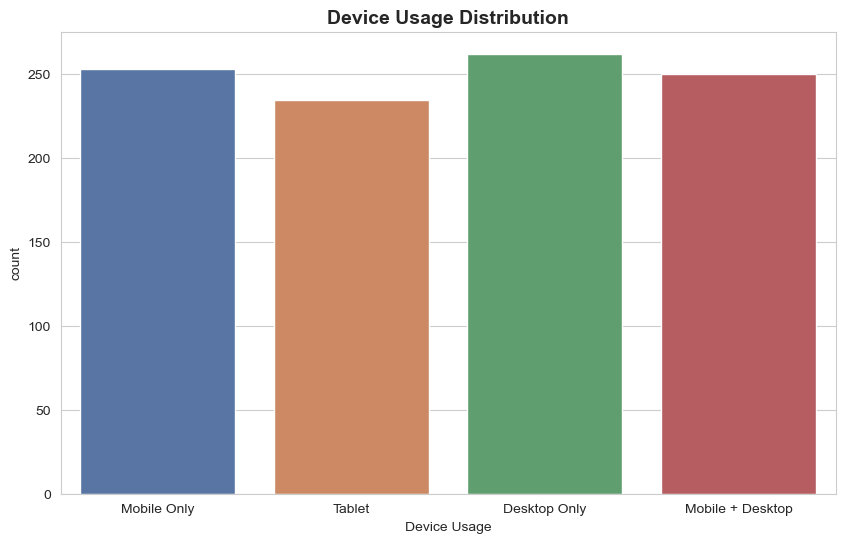

In [51]:
# device usage distribution
custom_palette = sns.color_palette("deep")

# Device Usage Distribution 
plt.figure(figsize=(10, 6))
sns.countplot(x='Device Usage', data=data, palette=custom_palette)
plt.title('Device Usage Distribution', fontsize=14, fontweight='bold')
plt.xticks()
plt.show()

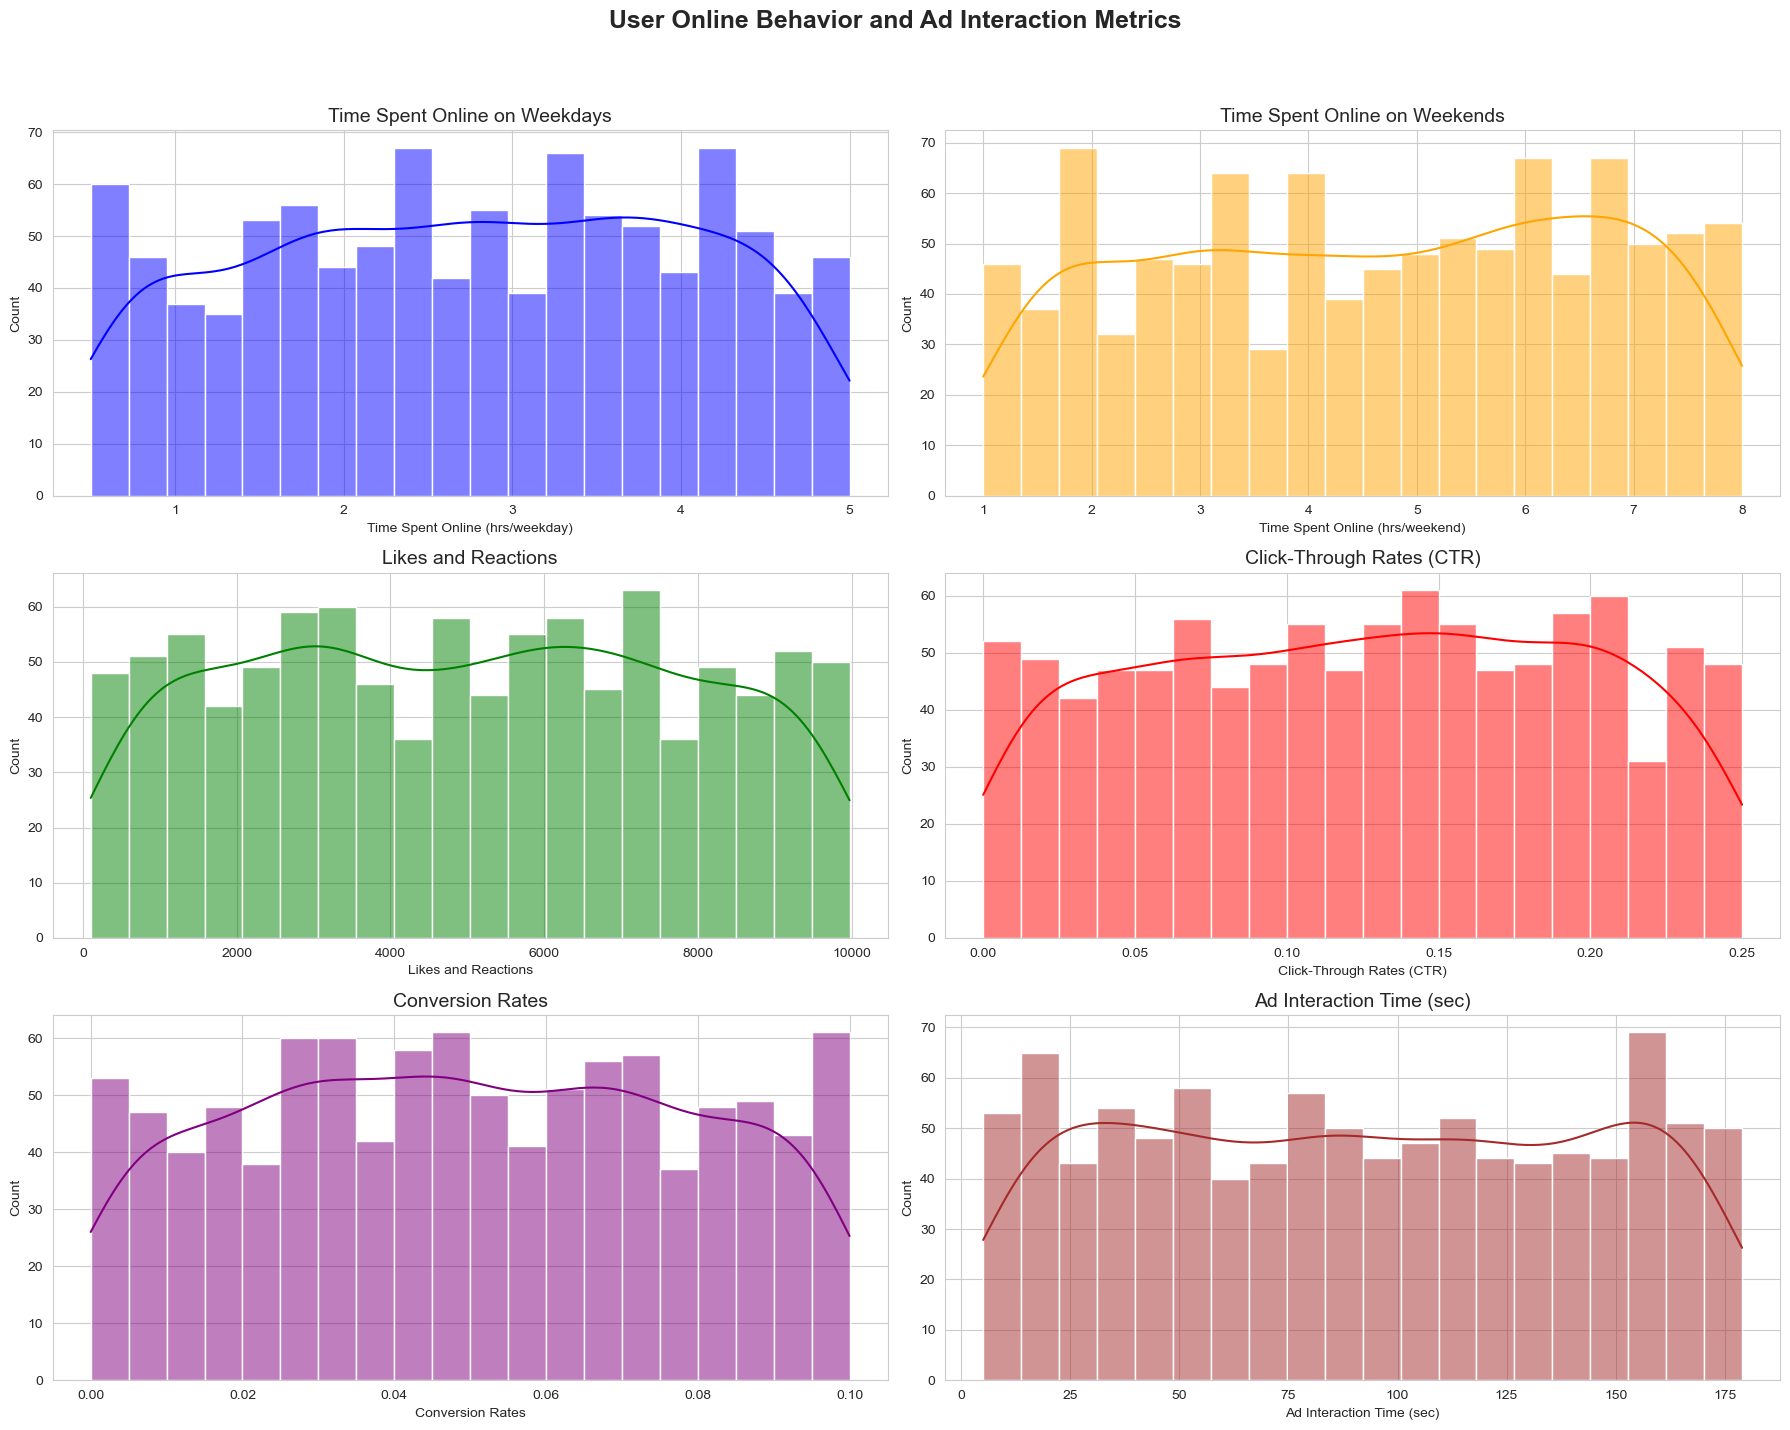

In [65]:
# Set Seaborn style
sns.set_style("whitegrid")
custom_palette = sns.color_palette("viridis")

# Create subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics', fontsize=18, fontweight='bold')

# Time spent online on weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='blue')
axes[0, 0].set_title('Time Spent Online on Weekdays', fontsize=14)

# Time spent online on weekends
sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends', fontsize=14)

# Likes and reactions
sns.histplot(ax=axes[1, 0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
axes[1, 0].set_title('Likes and Reactions', fontsize=14)

# Click-through rates
sns.histplot(ax=axes[1, 1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
axes[1, 1].set_title('Click-Through Rates (CTR)', fontsize=14)

# Conversion rates
sns.histplot(ax=axes[2, 0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[2, 0].set_title('Conversion Rates', fontsize=14)

# Ad interaction time
sns.histplot(ax=axes[2, 1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_12256\4119695293.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




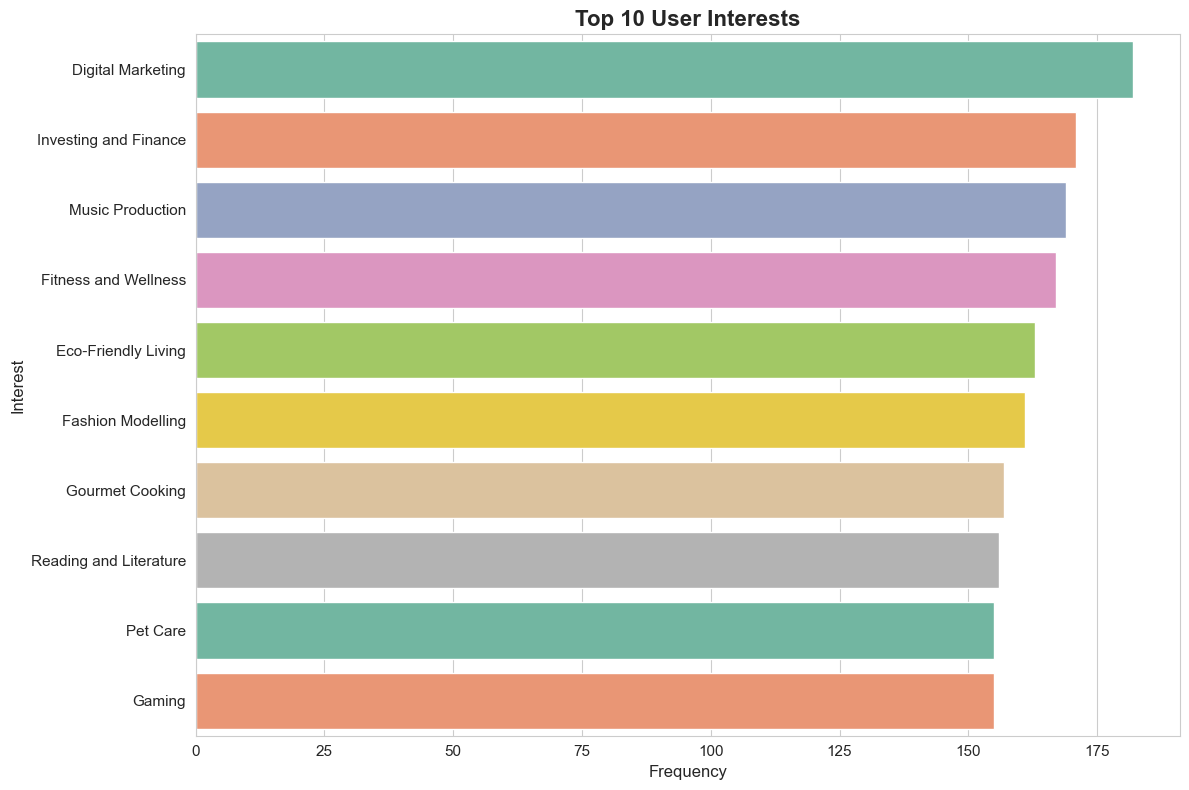

In [53]:
from collections import Counter

# Seaborn style for consistency
sns.set_style("whitegrid")
custom_palette = sns.color_palette("viridis")

# Splitting the 'Top Interests' column and creating a list of all interests
interests_list = data['Top Interests'].str.split(', ').sum()

# Counting the frequency of each interest
interests_counter = Counter(interests_list)

# Converting the counter object to a DataFrame for easier plotting
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plotting the Top 10 User Interests
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Interest', data=interests_df.head(10), palette='Set2')
plt.title('Top 10 User Interests', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Interest', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

In [54]:
#differentiating between categorical data and numerical data
categorical_cols = ['Age', 'Gender', 'Location', 'Language', 'Education Level', 'Device Usage', 'Income Level']
numerical_cols = ['Likes and Reactions', 'Followed Accounts', 'Time Spent Online (hrs/weekday)',
                  'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 
                  'Conversion Rates', 'Ad Interaction Time (sec)']

In [55]:
# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [56]:
# Transform features
X_processed = preprocessor.fit_transform(data)

In [57]:
# Elbow Method to find optimal k
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_processed)
    sse.append(kmeans.inertia_)

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

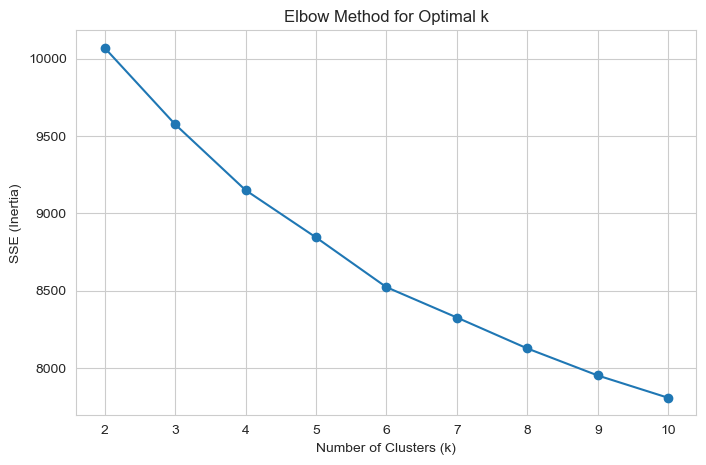

In [58]:
# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [59]:
# Choose optimal k (e.g. from elbow curve)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans_final.fit_predict(X_processed)

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [60]:
# Add cluster labels
data['Cluster'] = clusters

In [61]:
# Step 7: Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Add PCA results to DataFrame
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]


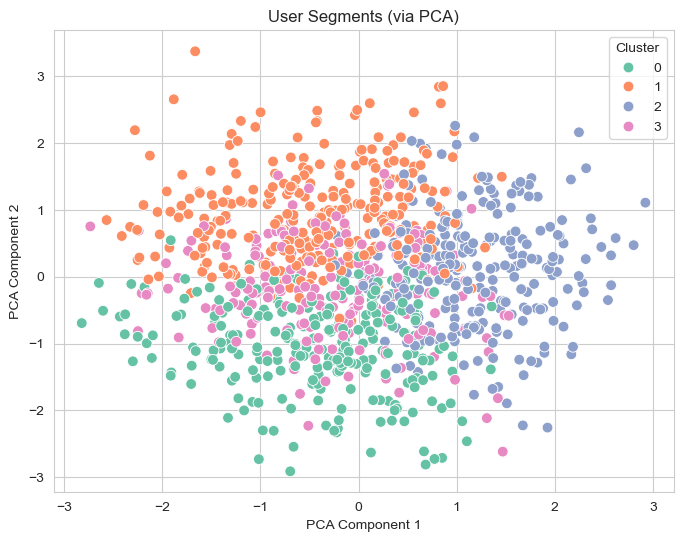

In [62]:
# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=60)
plt.title("User Segments (via PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [64]:
# Basic cluster profiling
print("Cluster Profile Summary:\n")
profile = data.groupby("Cluster")[numerical_cols].mean().round(2)
print(profile)

Cluster Profile Summary:

         Likes and Reactions  Followed Accounts  \
Cluster                                           
0                    3406.31             186.98   
1                    6761.37             328.71   
2                    6268.43             251.56   
3                    2835.07             220.36   

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                                   3.30                             6.06   
1                                   2.31                             5.78   
2                                   2.90                             2.66   
3                                   2.55                             3.54   

         Click-Through Rates (CTR)  Conversion Rates  \
Cluster                                                
0                             0.15              0.06   
1                             0.10  

We can say that the 4 different clusters represent 4 different groups.
0 represents the most active people, even on the weekends.
1 represents outgoing & expressive people who tend to have many friends.
2 represents that the use group finds the ad interesting and more likely to click on them.
3 represents least interactive people or professions.